Plot the bathymetry contours on top of true color image.

In [20]:
import sys
sys.path.insert(0, '..')
import datetime
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from filament import filament
import netCDF4
import logging
import copy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from importlib import reload
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

In [19]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Starting")
figdir = "../figures/"

INFO:root:Starting


### Visible image

In [15]:
visibledir = "/data/Visible/"
visibleim = "Sentinel-2_L1C_2020-05-15.tiff"
if os.path.exists(os.path.join(visibledir, visibleim)):
    print("Reading geoTIFF file {}".format(visibleim))
    vis = filament.Visible()
    vis.read_geotiff(os.path.join(visibledir, visibleim))
else:
    logger.warning("No visible image, specify domain coordinates")

Reading geoTIFF file Sentinel-2_L1C_2020-05-15.tiff


## Bathymetry

In [18]:
domain = (2., 4.25, 51., 52.)
bath = filament.Bathymetry()
bath.read_from_EMODnet_dtm("/data/EMODnet/Bathymetry/E4_2018.dtm", domain)

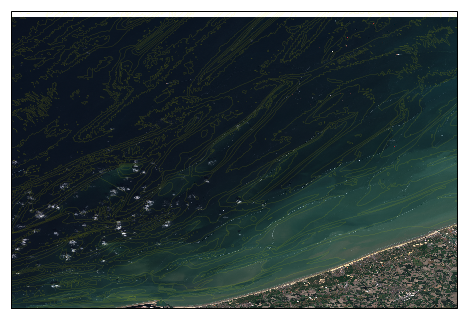

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
vis.add_to_plot(ax, myproj)
ax.contour(bath.lon, bath.lat, bath.depth, 
           levels=np.arange(-50, 0., 5.), 
           colors="yellow", linewidths=.1, alpha=1)
plt.xlim(2.15, 2.75)
plt.ylim(51.05, 51.45)
plt.savefig(os.path.join(figdir, "northsea_bathy_sentinel2"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()